In [18]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

In [19]:
data = pd.read_csv('../data/nyc_income.csv')

In [20]:
data = data.dropna()

In [21]:
data

UNEMP_RATE  cartodb_id  withssi  withsocial  withpubass  struggling  \
1       0.081705           2      228         353          47         694   
2       0.170603           3      658        1577         198        2589   
4       0.088037           5      736        1382         194        2953   
5       0.056296           6        0          99           0         337   
6       0.084474           7      261        1122         145        3085   
...          ...         ...      ...         ...         ...         ...   
2160    0.083264        2161       95         441          74        1043   
2161    0.092720        2162      155         376          85         947   
2162    0.132520        2163       88         186          86         846   
2163    0.075558        2164      178         256         263         919   
2164    0.051793        2165       15         144          19         289   

      profession  popunemplo  poptot  popover18  ...    shape_leng  \
1              0          92    2773       2351  ...   4748.703641   
2             36         549    8339       6878  ...   8568.208357   
4             19         379   10760       8867  ...   6973.204078   
5            745         321    7024       6637  ...  12076.323386   
6             18         432   10955       8932  ...   6353.030954   
...          ...         ...     ...        ...  ...           ...   
2160          39         199    5266       3839  ...  18497.958197   
2161          55         284    6444       4780  ...  13923.143577   
2162           0         163    3124       1949  ...   8255.052315   
2163           6         132    4296       2855  ...  18063.518237   
2164           0          26    1095        833  ...  37832.003531   

        shape_area  ct2010  boroct2010  borocode  tractid       popdty  \
1     9.716282e+05     201     1000201         1     2.01   79619.0500   
2     3.315121e+06     202     1000202         1     2.02   72326.4600   
4     2.583270e+06     600     1000600         1     6.00  109785.0000   
5     2.528570e+06     700     1000700         1     7.00   71641.8000   
6     2.356897e+06     800     1000800         1     8.00  130376.5000   
...            ...     ...         ...       ...      ...          ...   
2160  7.821803e+06   30301     5030301         5   303.01   19092.5200   
2161  9.788329e+06   30302     5030302         5   303.02   18294.7700   
2162  4.126572e+06   31901     5031901         5   319.01   20850.7200   
2163  7.018116e+06   31902     5031902         5   319.02   16113.0400   
2164  4.120270e+07   32300     5032300         5   323.00     734.6357   

          geo_fips        lon        lat  
1     3.606140e+20 -73.985847  40.711867  
2     3.606140e+20 -73.981325  40.712140  
4     3.606140e+20 -73.989476  40.711952  
5     3.606140e+20 -74.007513  40.705371  
6     3.606140e+20 -73.994511  40.711775  
...            ...        ...        ...  
2160  3.608570e+20 -74.156319  40.618866  
2161  3.608570e+20 -74.158738  40.623528  
2162  3.608570e+20 -74.163326  40.630260  
2163  3.608570e+20 -74.165732  40.637851  
2164  3.608570e+20 -74.178533  40.633960  

[2110 rows x 115 columns]

In [22]:
data.shape

(2110, 115)

In [23]:
middle_income = data['medianinco']

In [24]:
middle_income.shape

(2110,)

In [25]:
features = data[['UNEMP_RATE', 'withssi', 'withpubass', 'profession', 'popover18', 'popinlabou',
                 'poor', 'otherethni', 'mixed', 'master', 'maleover18', 'maleinlabo', 'maledrop',
                 'male', 'hispanic', 'highschool', 'femaleover', 'femaleinla', 'femaledrop', 'female',
                 'europeanun', 'europeanin', 'european', 'doctorate', 'college', 'bachelor',
                 'asian', 'african', 'popdty']]

In [26]:
loc = data[['lon', 'lat']]

In [27]:
loc.shape

(2110, 2)

In [28]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp = train_test_split(features, middle_income, loc, train_size=0.8, random_state=42)

In [29]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [30]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [31]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
model.score(X_test, y_test)

0.6843266672597385

In [33]:
explainer = GeoConformalizedExplainer(model, X_train, X_calib, loc_calib.values, loc_test.values, 0.1, 0.15)

In [34]:
results = explainer.uncertainty_aware_explain(x_test=X_test)

Training SHAP


PermutationExplainer explainer: 1689it [05:40,  4.81it/s]                          


Calibrating SHAP


PermutationExplainer explainer: 212it [00:41,  3.86it/s]                         


Testing SHAP


PermutationExplainer explainer: 212it [00:45,  3.52it/s]                         


Explaining Variables


C:\Users\Xiayin\PycharmProjects\UncertaintyGeoXAI\GeoConformalizedExplainer\GeoConformalizedExplainer.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature_name}_geo_uncertainty'] = geocp_result.geo_uncertainty
C:\Users\Xiayin\PycharmProjects\UncertaintyGeoXAI\GeoConformalizedExplainer\GeoConformalizedExplainer.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature_name}_uncertainty'] = geocp_result.uncertainty
C:\Users\Xiayin\PycharmProjects\UncertaintyGeoXAI\GeoConformalizedExplainer\GeoConformalizedEx

In [35]:
results.accuracy_summary()

coverage_probability        R2         RMSE      SHAP_Var  \
UNEMP_RATE              0.872038  0.612189  1368.587396  4.829752e+06   
withssi                 0.886256  0.901031  1511.239916  2.307644e+07   
withpubass              0.876777  0.649779  1267.603255  4.588009e+06   
profession              0.943128  0.944010  1424.112421  3.622216e+07   
popover18               0.872038  0.890178  1097.921409  1.097623e+07   
popinlabou              0.900474  0.424327  1055.818274  1.936432e+06   
poor                    0.909953  0.938543  2626.611700  1.122586e+08   
otherethni              0.938389  0.286903  1760.799409  4.347818e+06   
mixed                   0.919431  0.120491   777.881036  6.879965e+05   
master                  0.900474  0.889789  1821.383266  3.010079e+07   
maleover18              0.862559  0.920811  1172.032348  1.734664e+07   
maleinlabo              0.900474  0.881683  1359.909265  1.563055e+07   
maledrop                0.938389  0.141463   361.261861  1.520146e+05   
male                    0.924171  0.938323  1084.752650  1.907815e+07   
hispanic                0.857820  0.102703  1037.366626  1.199301e+06   
highschool              0.890995  0.745553  1752.463964  1.206981e+07   
femaleover              0.914692  0.921374  1054.452791  1.414130e+07   
femaleinla              0.853081  0.825408  1189.361434  8.102214e+06   
femaledrop              0.876777  0.050105   501.800791  2.650862e+05   
female                  0.881517  0.712972  1338.322570  6.240176e+06   
europeanun              0.895735  0.204593   657.612499  5.436894e+05   
europeanin              0.890995  0.549133   837.722602  1.556510e+06   
european                0.900474  0.483113   753.900685  1.099594e+06   
doctorate               0.924171  0.148792  1061.321976  1.323300e+06   
college                 0.914692  0.333657  1161.299113  2.023905e+06   
bachelor                0.914692  0.817108  1200.176139  7.875825e+06   
asian                   0.905213  0.433614  1249.308132  2.755668e+06   
african                 0.857820  0.319959  1295.479089  2.467888e+06   
popdty                  0.848341  0.857033  1370.900055  1.314543e+07   

            Pred_SHAP_Var  
UNEMP_RATE   3.265364e+06  
withssi      1.924448e+07  
withpubass   2.367899e+06  
profession   3.873926e+07  
popover18    9.918680e+06  
popinlabou   8.271006e+05  
poor         1.171832e+08  
otherethni   1.399246e+06  
mixed        1.536029e+05  
master       3.070339e+07  
maleover18   1.694167e+07  
maleinlabo   1.219088e+07  
maledrop     2.757301e+04  
male         1.815862e+07  
hispanic     7.021820e+05  
highschool   7.382947e+06  
femaleover   1.187030e+07  
femaleinla   6.663274e+06  
femaledrop   4.173971e+04  
female       4.665214e+06  
europeanun   1.600152e+05  
europeanin   6.067096e+05  
european     6.905082e+05  
doctorate    3.784515e+05  
college      7.293912e+05  
bachelor     6.713002e+06  
asian        9.842355e+05  
african      1.625249e+06  
popdty       1.387927e+07

In [36]:
results.accuracy_summary().to_csv('./NYCIncome_accuracy_summary.csv')

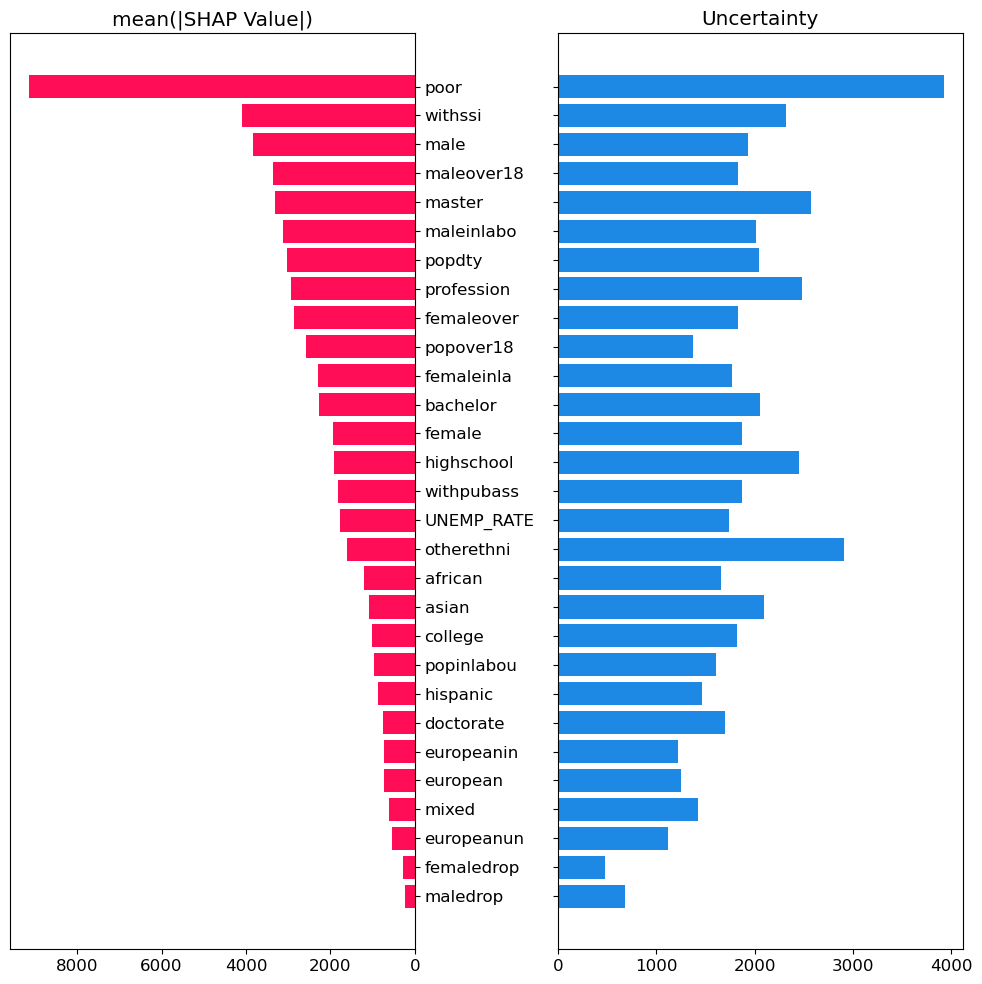

In [37]:
results.plot_absolute_shap_value_with_uncertainty(filename='./NYCIncome_absolute_shap_value_with_uncertainty.pdf')

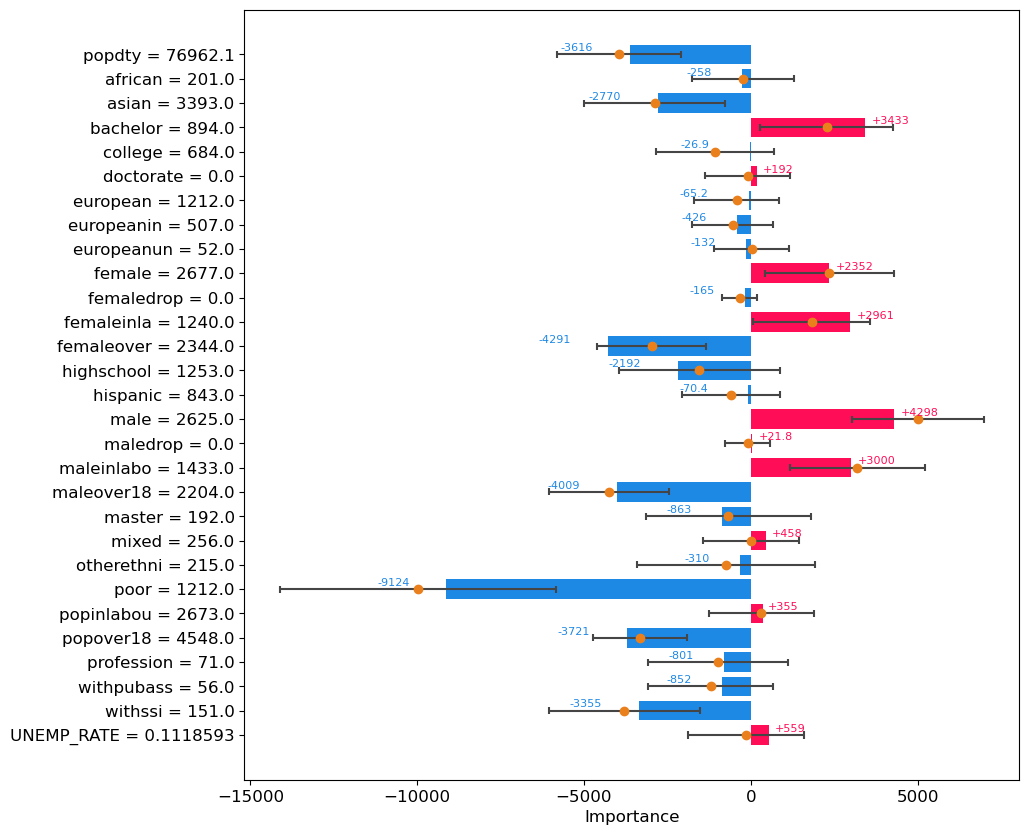

In [38]:
results.plot_shap_values_with_uncertainty(15, filename='./NYCIncome_shap_values_with_uncertainty.pdf')

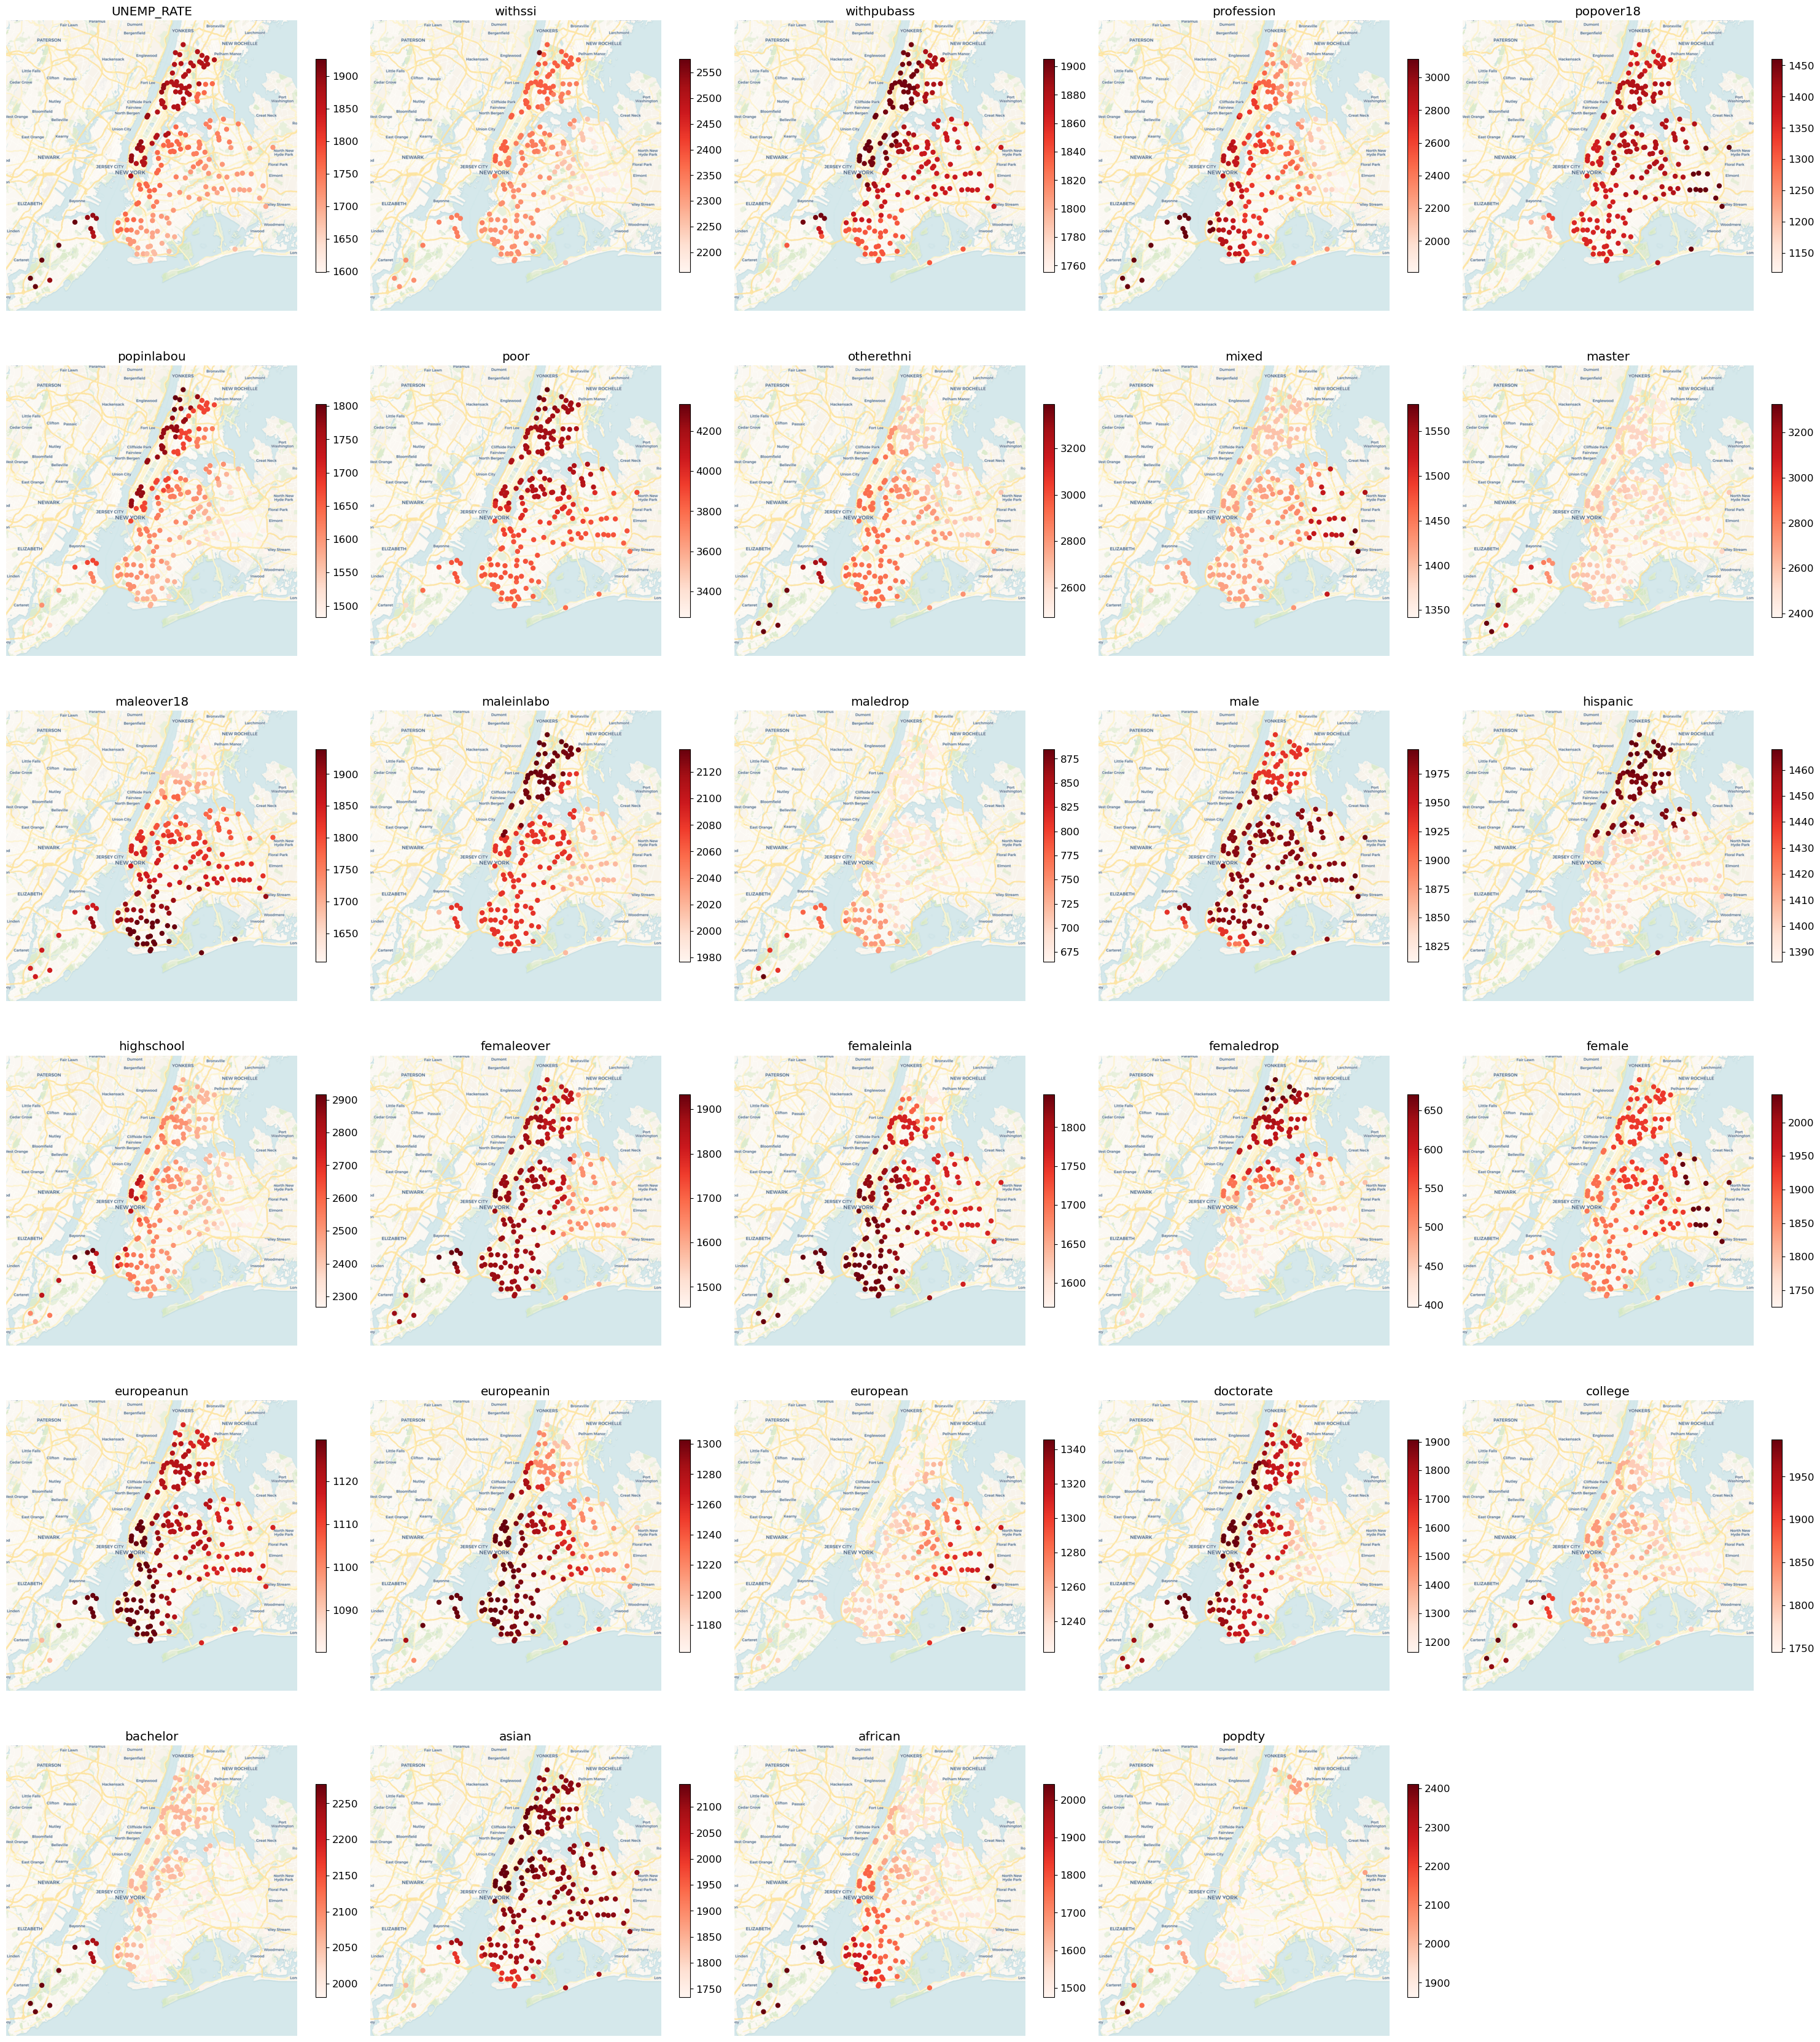

In [39]:
results.plot_geo_uncertainty(figsize=[30, 40], shrink=0.3, filename='NYCIncome_geo_uncertainty.pdf')

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00

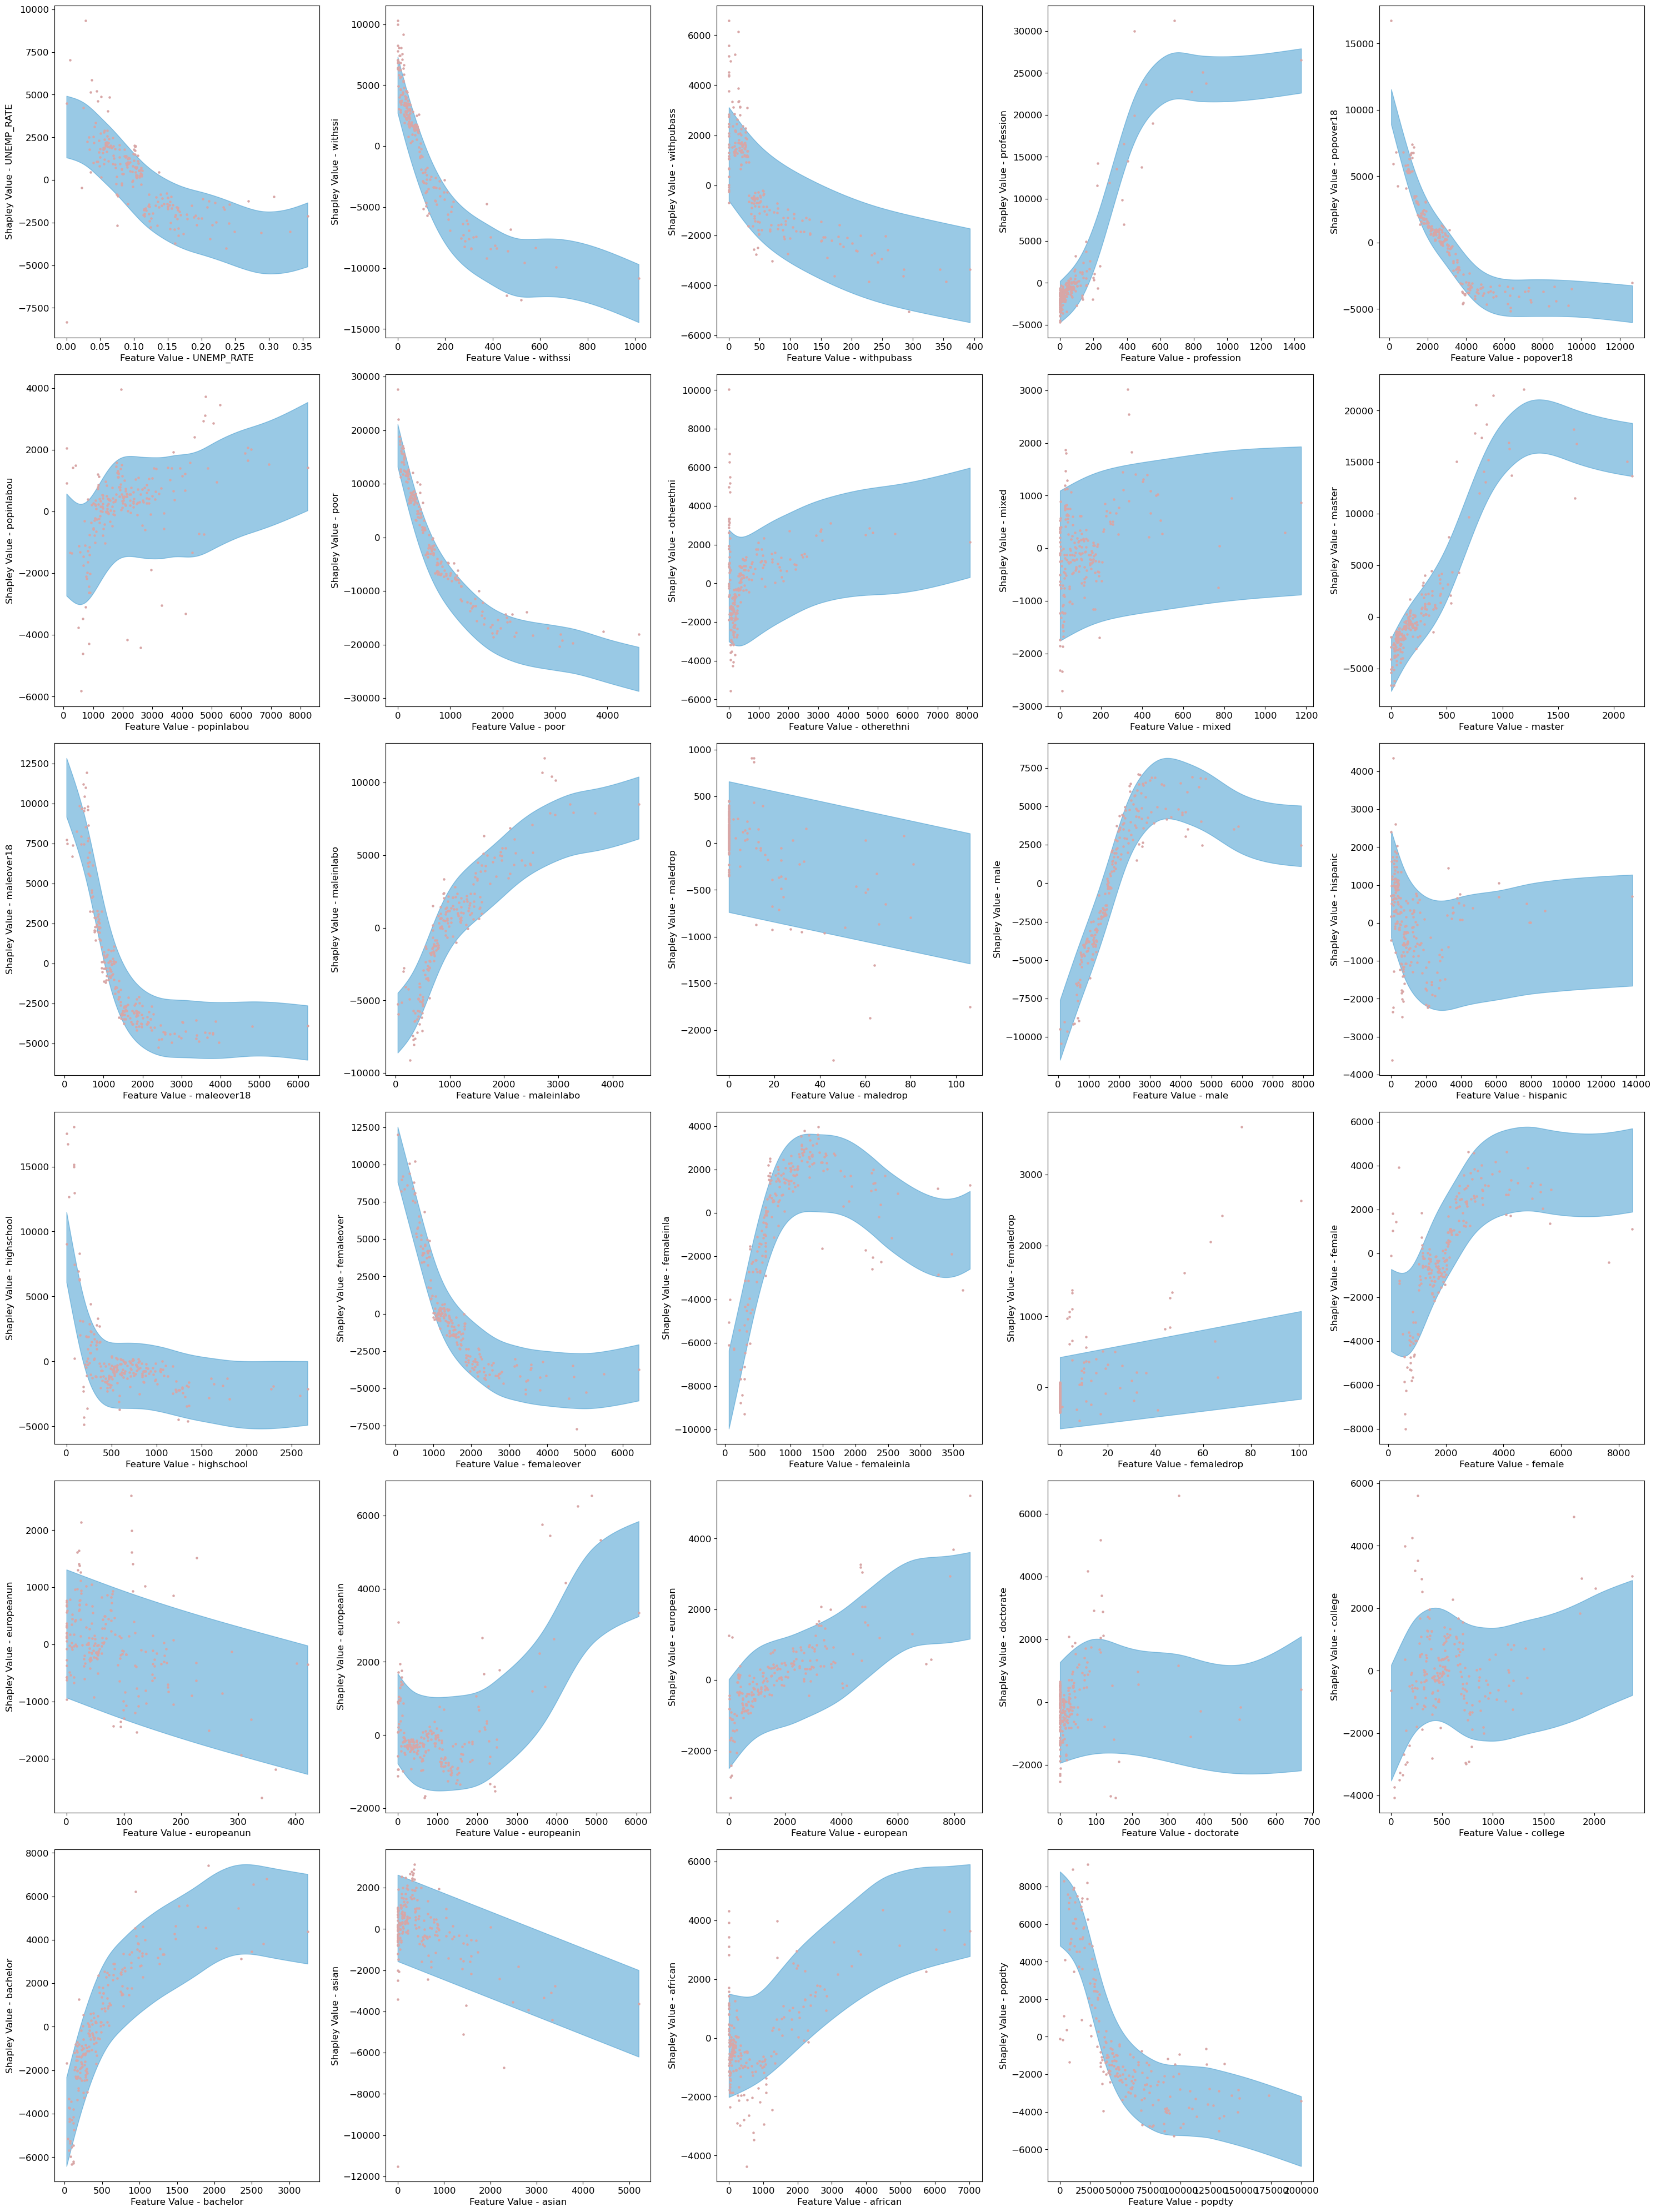

In [40]:
results.plot_partial_dependence_with_fitted_bounds(figsize=[30, 40], filename='NYCIncome_partial_dependence_with_fitted_bounds.pdf')